In [163]:
import pandas as pd
from acquire import get_store_data
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Exercises 1
Using your store items data you acquired in lesson 1 exercises:

In [4]:
df = get_store_data().drop(columns = ['store_id','item_id'])
df.head()

,store_address,store_city,store_state,store_zipcode,item,sale_amount,sale_date,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14
0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


- Convert date column to datetime format.

In [6]:
# Reassign the sale_date column to be a datetime type
df['sale_date'] = pd.to_datetime(df['sale_date'])

- Plot the distribution of sale_amount and item_price.

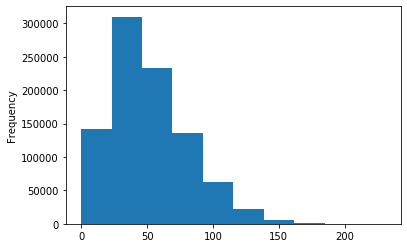

In [8]:
df.sale_amount.plot.hist()

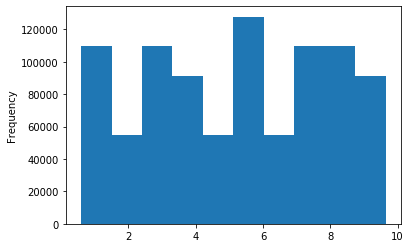

In [9]:
df.item_price.plot.hist()

- Set the index to be the datetime variable.

In [ ]:
# Sort rows by the date and then set the index as that date
df = df.sort_values("sale_date").set_index("sale_date")

- Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [18]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()
df.head(1)

,store_address,store_city,store_state,store_zipcode,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday


- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [19]:
df['sales_total'] = df.sale_amount * df.item_price
df.head(1)

,store_address,store_city,store_state,store_zipcode,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92


- Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [21]:
df["diff(1)"] = df.sales_total.diff(1)
df.head(1)

,store_address,store_city,store_state,store_zipcode,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total,diff(1)
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92,NaN


- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [23]:
def prepare_store_data(): 
    df = get_store_data().drop(columns = ['store_id','item_id'])
    # Reassign the sale_date column to be a datetime type
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    # Sort rows by the date and then set the index as that date
    df = df.sort_values("sale_date").set_index("sale_date")
    # Add a 'month' and 'day of week' column
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    # Add a column sales_total
    df['sales_total'] = df.sale_amount * df.item_price
    # create a new column current sales - the previous days sales
    df["diff(1)"] = df.sales_total.diff(1)
    return df

## Exercise 2
Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [24]:
ops = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
ops.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


- Convert date column to datetime format.

In [26]:
ops['Date'] = pd.to_datetime(ops['Date'])

- Plot the distribution of each of your variables.

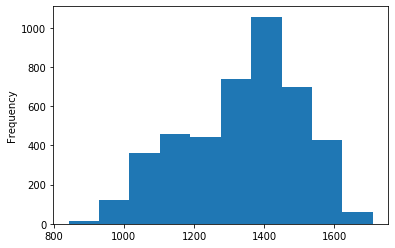

In [27]:
ops.Consumption.plot.hist()

- Set the index to be the datetime variable.

In [30]:
ops = ops.sort_values("Date").set_index("Date")

- Add a month and a year column to your dataframe.

In [37]:
ops['month'] = ops.index.month
ops['year'] = ops.index.year
ops.head(1)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006


- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [38]:
def prepare_ops_data():
    ops = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
    #onvert date column to datetime format
    ops['Date'] = pd.to_datetime(ops['Date'])
    #Set the index to be the datetime variable.
    ops = ops.sort_values("Date").set_index("Date")
    #Add a month and a year column to your dataframe
    ops['month'] = ops.index.month
    ops['year'] = ops.index.year
    return ops

## Exercise 3
Install and use the vega_datasets for the next exercise
For the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

`pip install vega_datasets`

You can use this library like so:

In [39]:
from vega_datasets import data

In [70]:
df = data.sf_temps()
df.head(12)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
5,45.8,2010-01-01 05:00:00
6,45.9,2010-01-01 06:00:00
7,45.9,2010-01-01 07:00:00
8,46.4,2010-01-01 08:00:00
9,48.0,2010-01-01 09:00:00


In [86]:
#set the dataframe's index to the date column
df = df.sort_values('date').set_index('date')

In [87]:
df.shape

(8759, 1)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
temp    8759 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


Use the above dataset for the exercises below:

- Resample by the day and take the average temperature. Visualize the average temperature over time.

In [91]:
s =df.temp.resample("D").mean()
s.head()

date
2010-01-01    49.170833
2010-01-02    49.304167
2010-01-03    49.391667
2010-01-04    49.445833
2010-01-05    49.491667
Freq: D, Name: temp, dtype: float64

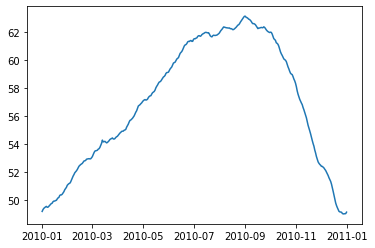

In [92]:
plt.plot(s.index, s)

- Write the code necessary to visualize the minimum temperature over time.

In [94]:
s =df.temp.resample("D").min()
s.head()

date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
2010-01-04    46.1
2010-01-05    46.1
Freq: D, Name: temp, dtype: float64

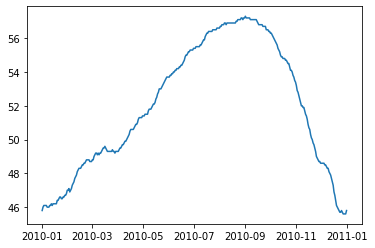

In [95]:
plt.plot(s.index, s)

- Write the code necessary to visualize the maximum temperature over time.

In [96]:
s =df.temp.resample("D").max()
s.head()

date
2010-01-01    53.3
2010-01-02    53.4
2010-01-03    53.5
2010-01-04    53.6
2010-01-05    53.8
Freq: D, Name: temp, dtype: float64

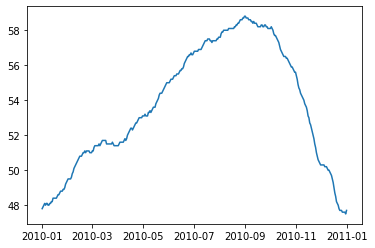

In [51]:
plt.plot(s.index, s)

- Which month is the coldest, on average?

In [98]:
s = df.temp.resample('M').mean()
s.nsmallest(1)

date
2010-01-31    49.98414
Freq: M, Name: temp, dtype: float64

- Which month has the highest average temperature?

In [99]:
s= df.temp.resample('M').mean()
s.nlargest(1)

date
2010-09-30    62.487083
Freq: M, Name: temp, dtype: float64

- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [102]:
s = df.temp.resample('D').agg(['min', 'max'])
s['temp_diff'] = s.iloc[:,1] - s.iloc[:,0]
s.head(10)

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
2010-01-06,46.1,53.8,7.7
2010-01-07,46.0,53.8,7.8
2010-01-08,46.0,53.9,7.9
2010-01-09,46.0,54.0,8.0


In [105]:
s.temp_diff.resample('M').mean().nlargest(1)

date
2010-09-30    14.403333
Freq: M, Name: temp_diff, dtype: float64

- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [107]:
s = df.temp.resample('D').agg(['min','mean', 'max'])
s.head()

,min,mean,max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8


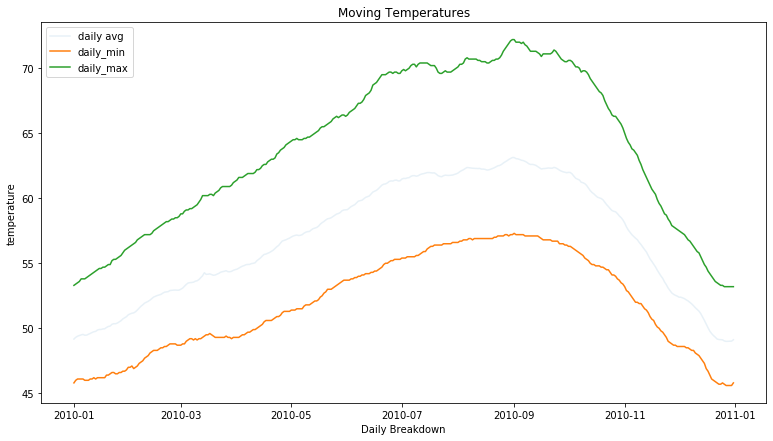

In [108]:
rolling_example = pd.DataFrame()

rolling_example["daily_min"] =s.iloc[:,0]
rolling_example["daily_average"] = s.iloc[:,1]
rolling_example["daily_max"] = s.iloc[:,2]

plt.figure(figsize=(13, 7))
plt.title("Moving Temperatures")
plt.xlabel("Daily Breakdown")
plt.ylabel("temperature")

# It's useful to lower the alpha/opacity to reduce the noise
plt.plot(rolling_example.index, rolling_example.daily_average, alpha=0.1)

plt.plot(rolling_example.index, rolling_example["daily_min"])
plt.plot(rolling_example.index, rolling_example["daily_max"])
plt.legend(['daily avg', "daily_min","daily_max"], loc='upper left')
plt.show()

## Exercise 4
Use the `Vega_Datasets` to work with the flights_20k data

In [109]:
df =data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [110]:
df.shape

(20000, 5)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
date           20000 non-null datetime64[ns]
delay          20000 non-null int64
distance       20000 non-null int64
origin         20000 non-null object
destination    20000 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [115]:
df = df.sort_values('date').set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


- Convert any negative delays to 0.

In [119]:
df['delay'] =  df.delay.apply((lambda x: 0 if x < 0 else x))
df.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
148        1
213        1
245        1
360        1
147        1
Name: delay, Length: 194, dtype: int64

- Which hour of the day has the highest average delay?

In [145]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [147]:
df.groupby('hour').delay.mean().nlargest(1)

hour
3    302.5
Name: delay, dtype: float64

- Does the day of the week make a difference in the delay amount?

In [155]:
df['day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


Text(0.5, 1.0, 'Daily average delay time')

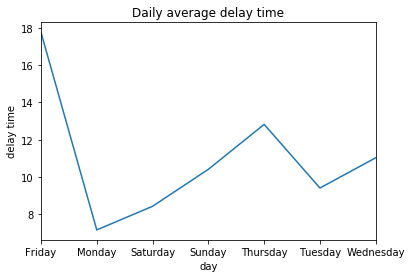

In [162]:
df.groupby('day').delay.mean().plot()
plt.ylabel('delay time')
plt.title('Daily average delay time')

- Does the month make a difference in the delay amount?

Text(0.5, 1.0, 'Monthly average delay time')

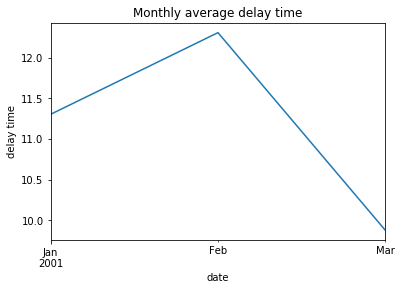

In [161]:
df.delay.resample('M').mean().plot()
plt.ylabel('delay time')
plt.title('Monthly average delay time')